<a href="https://colab.research.google.com/github/JennEsquivel/EDP1/blob/main/grafica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Gráficas del problema de Dirichlet**

Elaboró: Jennifer Esquivel Saldaña

Graficar para la ecuación:

$\frac{\partial^2 u}{\partial \:x^2}=\frac{\partial ^2u}{\partial y^2}, 0<x<1, 0<y<1$

para las condiciones:

$u(0,y)=0, $
$u(1,y)=0, $
$u(x,0)=100, $
$u(x,1)=200 $


Graficamos las condiciones u(x,0)=100, u(x,1)=200:

In [ ]:
from pylab import *
import math 

In [ ]:
def recta_1(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = 100
    return y
def recta_2(x):
    y=zeros(len(x))
    for i in range(len(x)):
        y[i] = 200
    return y

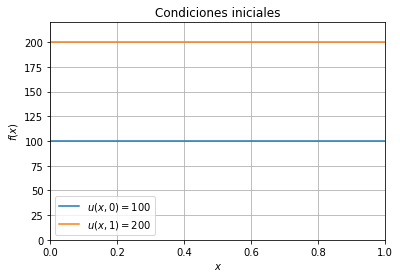

In [ ]:
x= linspace(0,1,1000)
x_1 = linspace(0,1,1000)
f_1 = recta_1(x_1)
x_2= linspace(0,1,1000)
f_2 = recta_2(x_2)
plot(x_1,f_1,label='$u(x,0)=100$')
plot(x_2,f_2,label='$u(x,1)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condiciones iniciales")
xlim([0,1]),ylim([0,220]),grid(),legend()
show()

Aproximamos las condiciones anteriormente graficadas
 con ayuda de la serie de Fourier.

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += 200.0*(1.0-cos(n*pi))*sin(n*pi*x)/(n*pi)
    return f
def u_1(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += 400.0*(1.0-cos(n*pi))*sin(n*pi*x)/(n*pi)
    return f
  

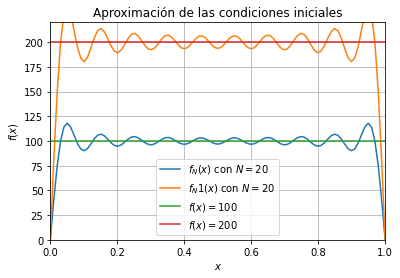

In [ ]:
f_n1 = u_1(x)
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f_n1,label='$f_N1(x)$ con $N=20$')
plot(x_1,f_1,label='$f(x)=100$ ')
plot(x_2,f_2,label='$f(x)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de las condiciones iniciales")
xlim([0,1]),ylim([0,220]),grid(),legend()
show()

Se pueden unar n cantidad de armónicos para visualizar la aproximación.

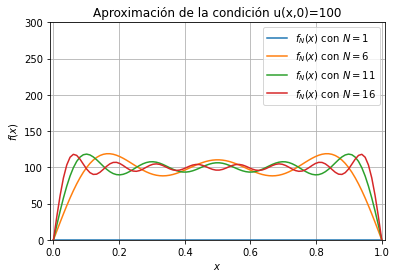

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición u(x,0)=100")
xlim([-0.01,1.01]),ylim([-0.01,300]),grid(),legend()
show()

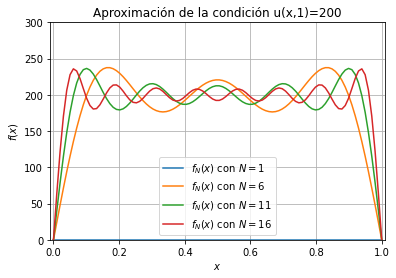

In [ ]:
for i in range(1,20,5):
    plot(x,u_1(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición u(x,1)=200")
xlim([-0.01,1.01]),ylim([-0.01,300]),grid(),legend()
show()

Graficamos la solución completa cuando y=0:

In [ ]:
def u_x_y(x,y,N=10):
    f = zeros( (len(x),len(y)) )
    for i in range(len(y)):
        for n in range(1,N):
            f[:,i] += (((1-(-1)**n)*cosh(n*pi*y[i])/n)+((1-(-1)**n)*(2-cosh(n*pi))/(n*sinh(n*pi)))*sinh(n*pi*y[i]))*sin(n*pi*x)
    return (200/pi)*f

In [ ]:
x = linspace(0,1,1000)
y = 10*linspace(0,1,1000)
U = u_x_y(x,y)

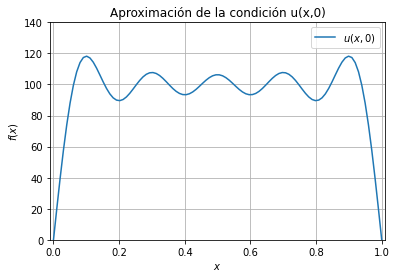

In [ ]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición u(x,0)")
xlim([-0.01,1.01]),ylim([0,140]),grid(),legend()
show()

Ahora, cuando $t\to1$
, la solución va evolucionando.

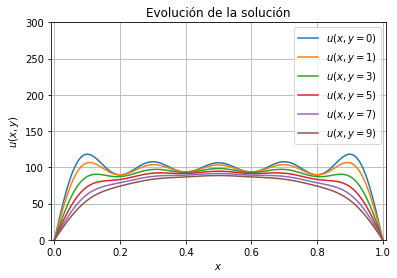

In [ ]:
plot(x,U[:,0],label='$u(x,y=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,y=1)$')
plot(x,U[:,3],label='$u(x,y=3)$')
plot(x,U[:,5],label='$u(x,y=5)$')
plot(x,U[:,7],label='$u(x,y=7)$')
plot(x,U[:,9],label='$u(x,y=9)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,300]),grid(),legend()
show()

Podemos graficar lo anterior en 3D:

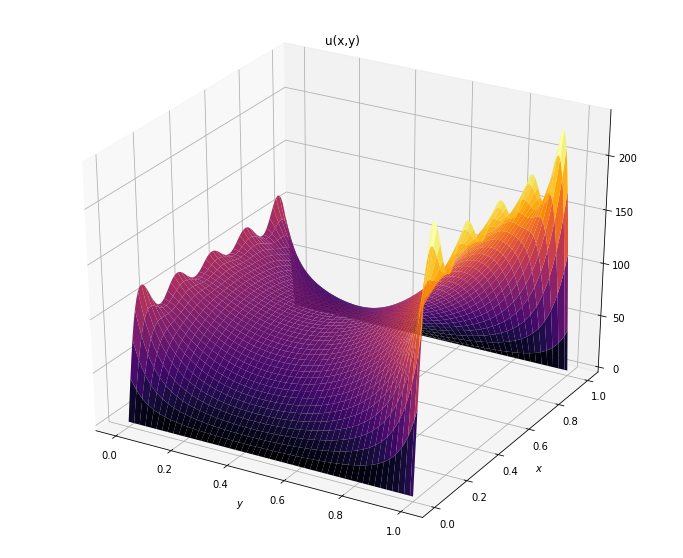

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
y = linspace(0,1.0,100)

X,Y = np.meshgrid(x,y)

U = u_x_y(x,y)

plt.xlabel('$y$'); plt.ylabel('$x$'); 
plt.title("u(x,y)")
ax.plot_surface(X, Y, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"